In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9667b35e4fe648fd876fec76b4374c1


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
  
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | sinazongwe
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | bonthe
Processing Record 5 of Set 1 | salinas
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | mineros
Processing Record 8 of Set 1 | havre-saint-pierre
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | xuanhua
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | vila velha
Processing Record 14 of Set 1 | chom bung
City not found. Skipping...
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | goma
Processing Record 17 of Set 1 | gonaives
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | pacific grove
Processing Record 20 of Set 1 | ponta delgada
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 

Processing Record 35 of Set 4 | fort nelson
Processing Record 36 of Set 4 | kidal
Processing Record 37 of Set 4 | poronaysk
Processing Record 38 of Set 4 | opuwo
Processing Record 39 of Set 4 | saint george
Processing Record 40 of Set 4 | kapaa
Processing Record 41 of Set 4 | sablan
Processing Record 42 of Set 4 | tabuk
Processing Record 43 of Set 4 | senador guiomard
Processing Record 44 of Set 4 | otavi
Processing Record 45 of Set 4 | marcona
City not found. Skipping...
Processing Record 46 of Set 4 | faya
Processing Record 47 of Set 4 | omsukchan
Processing Record 48 of Set 4 | esperance
Processing Record 49 of Set 4 | ixtapa
Processing Record 50 of Set 4 | aksarka
Processing Record 1 of Set 5 | arlit
Processing Record 2 of Set 5 | katherine
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | ilulissat
Processing Record 5 of Set 5 | jamestown
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | camargo
Processing Rec

Processing Record 23 of Set 8 | lima
Processing Record 24 of Set 8 | san rafael
Processing Record 25 of Set 8 | eskil
Processing Record 26 of Set 8 | harare
Processing Record 27 of Set 8 | isabela
Processing Record 28 of Set 8 | aflu
City not found. Skipping...
Processing Record 29 of Set 8 | mount isa
Processing Record 30 of Set 8 | ngunguru
Processing Record 31 of Set 8 | havoysund
Processing Record 32 of Set 8 | urusha
Processing Record 33 of Set 8 | almaznyy
Processing Record 34 of Set 8 | tasiilaq
Processing Record 35 of Set 8 | port-de-paix
City not found. Skipping...
Processing Record 36 of Set 8 | roswell
Processing Record 37 of Set 8 | kalabo
Processing Record 38 of Set 8 | broome
Processing Record 39 of Set 8 | bilma
Processing Record 40 of Set 8 | san vicente
Processing Record 41 of Set 8 | dossor
Processing Record 42 of Set 8 | monte alegre
Processing Record 43 of Set 8 | paka
Processing Record 44 of Set 8 | przasnysz
Processing Record 45 of Set 8 | waianae
Processing Recor

Processing Record 11 of Set 12 | tautira
Processing Record 12 of Set 12 | tumut
Processing Record 13 of Set 12 | bartica
Processing Record 14 of Set 12 | pangody
Processing Record 15 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 16 of Set 12 | sangar
Processing Record 17 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 18 of Set 12 | luderitz
Processing Record 19 of Set 12 | mayna
Processing Record 20 of Set 12 | ngaoundere
Processing Record 21 of Set 12 | sayyan
Processing Record 22 of Set 12 | rogers
Processing Record 23 of Set 12 | khipro
Processing Record 24 of Set 12 | qinzhou
Processing Record 25 of Set 12 | brownsville
Processing Record 26 of Set 12 | kirkwood
Processing Record 27 of Set 12 | srednekolymsk
Processing Record 28 of Set 12 | gull lake
Processing Record 29 of Set 12 | sobreira
Processing Record 30 of Set 12 | winnemucca
Processing Record 31 of Set 12 | yomitan
City not found. Skipping...
Processing Record 32 of Set 12 | y

In [10]:
# try:
#   Do something
# except:
#   print("An exception occurred")

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,44.42,68,75,14.97,CA,2021-10-19 20:52:31
1,Sinazongwe,-17.2614,27.4618,75.97,67,99,4.00,ZM,2021-10-19 20:52:31
2,Nikolskoye,59.7035,30.7861,33.87,79,96,3.69,RU,2021-10-19 20:52:31
3,Bonthe,7.5264,-12.5050,79.54,82,96,4.65,SL,2021-10-19 20:52:32
4,Salinas,36.6777,-121.6555,71.56,51,1,6.91,US,2021-10-19 20:52:32
5,Mar Del Plata,-38.0023,-57.5575,64.42,72,0,11.50,AR,2021-10-19 20:52:33
6,Mineros,-17.1167,-63.2333,89.87,28,59,3.62,BO,2021-10-19 20:52:33
7,Havre-Saint-Pierre,50.2334,-63.5986,50.36,87,90,5.75,CA,2021-10-19 20:52:33
8,Saskylakh,71.9167,114.0833,21.13,97,100,0.65,RU,2021-10-19 20:48:21
9,Xuanhua,40.6103,115.0447,37.15,35,0,1.10,CN,2021-10-19 20:52:34


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-10-19 20:52:31,62.4560,-114.3525,44.42,68,75,14.97
1,Sinazongwe,ZM,2021-10-19 20:52:31,-17.2614,27.4618,75.97,67,99,4.00
2,Nikolskoye,RU,2021-10-19 20:52:31,59.7035,30.7861,33.87,79,96,3.69
3,Bonthe,SL,2021-10-19 20:52:32,7.5264,-12.5050,79.54,82,96,4.65
4,Salinas,US,2021-10-19 20:52:32,36.6777,-121.6555,71.56,51,1,6.91
...,...,...,...,...,...,...,...,...,...
533,Acarau,BR,2021-10-19 20:56:34,-2.8856,-40.1200,80.58,79,27,15.77
534,Nago,JP,2021-10-19 20:56:34,26.5881,127.9761,73.56,62,98,11.95
535,Dickinson,US,2021-10-19 20:56:35,29.4608,-95.0513,84.13,75,86,1.01
536,Santa Maria,BR,2021-10-19 20:56:35,-29.6842,-53.8069,74.50,35,0,9.22


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

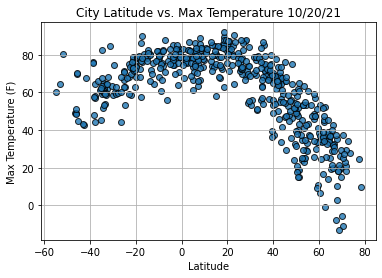

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

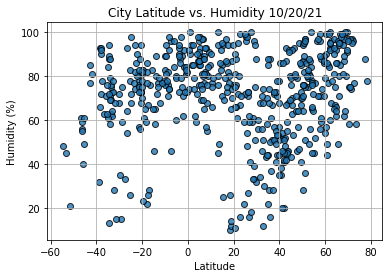

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

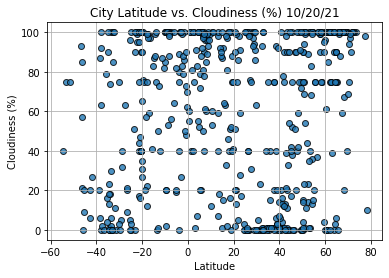

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

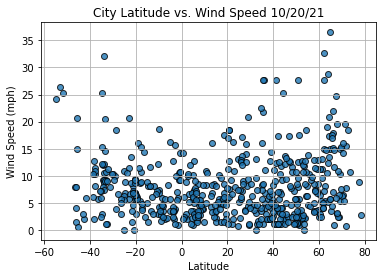

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]

In [31]:
index13

City                    Mahebourg
Country                        MU
Date          2021-10-19 20:51:07
Lat                      -20.4081
Lng                          57.7
Max Temp                    73.69
Humidity                       73
Cloudiness                     40
Wind Speed                   6.91
Name: 13, dtype: object

In [32]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
533    False
534     True
535     True
536    False
537    False
Name: Lat, Length: 538, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-10-19 20:52:31,62.4560,-114.3525,44.42,68,75,14.97
2,Nikolskoye,RU,2021-10-19 20:52:31,59.7035,30.7861,33.87,79,96,3.69
3,Bonthe,SL,2021-10-19 20:52:32,7.5264,-12.5050,79.54,82,96,4.65
4,Salinas,US,2021-10-19 20:52:32,36.6777,-121.6555,71.56,51,1,6.91
7,Havre-Saint-Pierre,CA,2021-10-19 20:52:33,50.2334,-63.5986,50.36,87,90,5.75


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

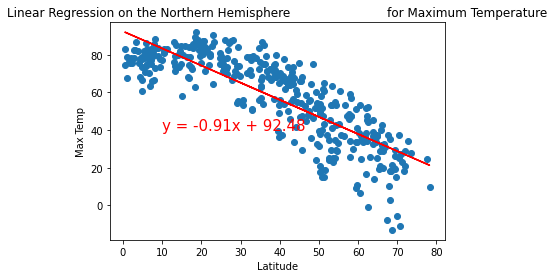

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

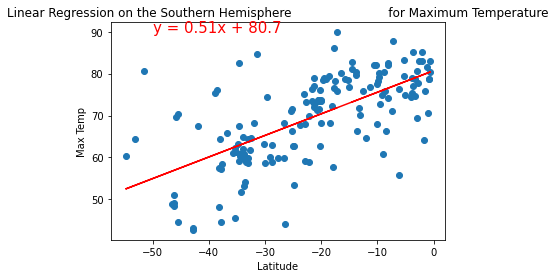

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

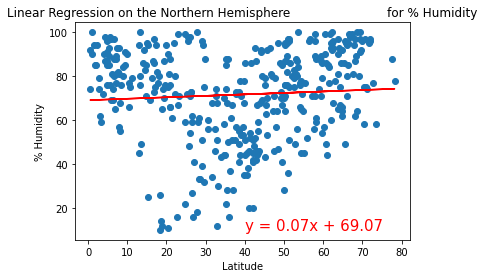

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

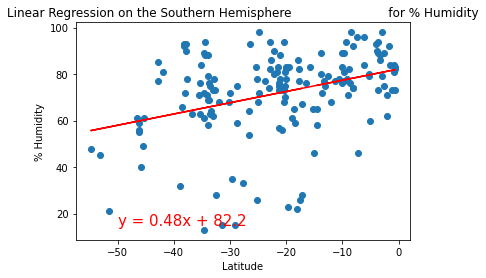

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

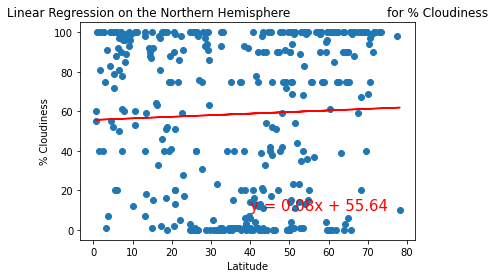

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60)

SyntaxError: unexpected EOF while parsing (<ipython-input-49-6472f2598d7a>, line 7)

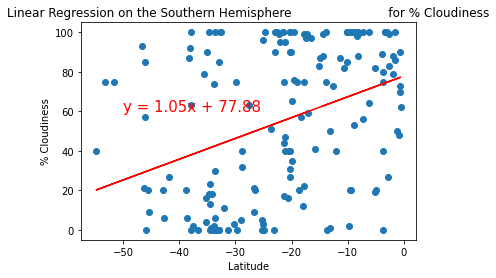

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

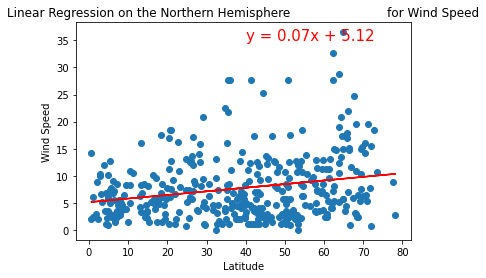

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

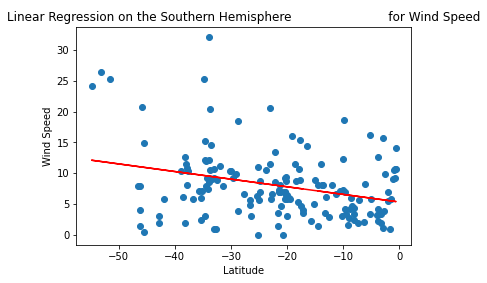

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))